# **[exercise 1]** Value chain and conversion processes
In this notebook you are prompted to **understand the basics of data science** to examine *time series data* and aggregate it. Furthermore you are required to learn **basic financial mathematics** to evaluate the *profitability of financial assets*.

Furthermore we will cover the following Python basics:
- [x] Matplotlib
- [x] Pandas
- [x] Dictionaries
- [x] Classes

In [5]:
import warnings

# Suppress warnings that packages might be outdated in the future
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
%run installation.py ;

## ENTSOG
The role of the European Network of Transmission System Operators for Gas ([ENTSOG](https://www.entsog.eu/)) is to facilitate and enhance cooperation between national gas transmission system operators (TSOs) across Europe, to ensure the development of a pan-European transmission system in line with European Union energy and climate goals.

The interconnected gas network in Europe:

![ENTSOG map](../../datasets/mes/exercise_1/figures/ENTSOG_CAP_2021_A0_1189x841_FULL_066_FLAT-1.png "ENTSOG map")

If we narrow it down for Germany, we can see the entry points for Greifswald, a station that was used to import gas via the north stream pipeline from Russia.

![ENTSOG Germany map](../../datasets/mes/exercise_1/figures/ENTSOG_CAP_2021_A0_1189x841_FULL_066_FLAT-1_Germany.png "ENTSOG map: Focus Germany")

With the beginning of the Russian war in Ukraine, the European Union has committed themselves to import less gas from Russia. Hereby the gas imports from this pipeline must be replaced. Our work will be to examine new ways for a gas import.

## Task 1 : Data Science <a class="anchor" id="task-1--data-science"></a>
The tasks of a Data Scientist include, for example, developing strategies for data analysis, preparing data for analysis, exploring, analysing and visually preparing data, building models with data using programming languages such as Python. For Energy System Analysis it is of greatest interest as there are large amounts of data that have to be dealt with.

### Task 1.1 : Identify the gas import via the pipeline <a class="anchor" id="#task-11--identify-the-gas-import-via-the-pipeline"></a>

**Task description:** Data regarding the physical gas flows are published on the ENTSO-G transparency platform and can be accessed freely. 
The data can be found via the following link: https://transparency.entsog.eu/#/map \
It is already downloaded in this directory and can be found in the folder `data` \
Read in the data from the attached excel file `export_operationaldata_2023_03_08_140746.xlsx`. Check and examine the data.

In [7]:
import pathlib

# Access to the "data" folder in the current directory
parent_folder = pathlib.Path.cwd().parents[1] / "datasets" / "mes" / "exercise_1" / "data"

# Accessing the file in the "data" folder
file_path = parent_folder / "export_operationaldata_2023_03_08_140746.xlsx"
file_path

PosixPath('/home/skortmann/datasets/mes/exercise_1/data/export_operationaldata_2023_03_08_140746.xlsx')

For this task we are using [Pandas](https://pandas.pydata.org/) for our Data Analysis. First, we are importing the data via the function ``pd.read_excel()``, have a quick read in the Pandas documentation on [how to import excel sheets](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

<div class="alert alert-block alert-warning">
<b>Reminder:</b> Do not forget to import pandas as a package!
</div>

In [8]:
import pandas as pd

data = pd.read_excel(io=file_path)
data

indicator periodType        periodFrom          periodTo   
0     Physical Flow        day  2021-01-01 06:00  2021-01-02 06:00  \
1     Physical Flow        day  2021-01-02 06:00  2021-01-03 06:00   
2     Physical Flow        day  2021-01-03 06:00  2021-01-04 06:00   
3     Physical Flow        day  2021-01-04 06:00  2021-01-05 06:00   
4     Physical Flow        day  2021-01-05 06:00  2021-01-06 06:00   
...             ...        ...               ...               ...   
1825  Physical Flow        day  2021-12-28 06:00  2021-12-29 06:00   
1826  Physical Flow        day  2021-12-29 06:00  2021-12-30 06:00   
1827  Physical Flow        day  2021-12-30 06:00  2021-12-31 06:00   
1828  Physical Flow        day  2021-12-31 06:00  2022-01-01 06:00   
1829  Physical Flow        day  2022-01-01 06:00  2022-01-02 06:00   

            tsoEicCode         operatorLabel         pointLabel   
0     21X-DE-D-A0A0A-K  Gasunie Deutschland    Greifswald / GUD  \
1     21X-DE-D-A0A0A-K  Gasunie Deutschland    Greifswald / GUD   
2     21X-DE-D-A0A0A-K  Gasunie Deutschland    Greifswald / GUD   
3     21X-DE-D-A0A0A-K  Gasunie Deutschland    Greifswald / GUD   
4     21X-DE-D-A0A0A-K  Gasunie Deutschland    Greifswald / GUD   
...                ...                   ...                ...   
1825  21X000000001309B                  LBTG  Greifswald / LBTG   
1826  21X000000001309B                  LBTG  Greifswald / LBTG   
1827  21X000000001309B                  LBTG  Greifswald / LBTG   
1828  21X000000001309B                  LBTG  Greifswald / LBTG   
1829  21X000000001309B                  LBTG  Greifswald / LBTG   

     tsoItemIdentifier directionKey   unit  ...  generalRemarks       value   
0     21Z000000000255M        entry  kWh/d  ...             NaN  1151441931  \
1     21Z000000000255M        entry  kWh/d  ...             NaN  1205939117   
2     21Z000000000255M        entry  kWh/d  ...             NaN  1213956982   
3     21Z000000000255M        entry  kWh/d  ...             NaN  1194102178   
4     21Z000000000255M        entry  kWh/d  ...             NaN  1180346596   
...                ...          ...    ...  ...             ...         ...   
1825  21Z000000000241X        entry  kWh/d  ...             NaN   773581601   
1826  21Z000000000241X        entry  kWh/d  ...             NaN   790596630   
1827  21Z000000000241X        entry  kWh/d  ...             NaN   793574659   
1828  21Z000000000241X        entry  kWh/d  ...             NaN   778994276   
1829  21Z000000000241X        entry  kWh/d  ...             NaN   673507724   

      lastUpdateDateTime isUnlimited  flowStatus isCamRelevant isNA   
0       2021-02-21 10:51         NaN   Confirmed           yes  NaN  \
1       2021-02-21 10:51         NaN   Confirmed           yes  NaN   
2       2021-02-21 10:51         NaN   Confirmed           yes  NaN   
3       2021-02-21 10:51         NaN   Confirmed           yes  NaN   
4       2021-02-21 10:51         NaN   Confirmed           yes  NaN   
...                  ...         ...         ...           ...  ...   
1825    2022-01-11 20:37         NaN   Confirmed           yes  NaN   
1826    2022-01-11 20:37         NaN   Confirmed           yes  NaN   
1827    2022-01-11 20:37         NaN   Confirmed           yes  NaN   
1828    2022-01-11 20:37         NaN   Confirmed           yes  NaN   
1829    2022-02-10 05:21         NaN   Confirmed           yes  NaN   

      isCmpRelevant interruptionCalculationRemark  isArchived  
0               yes                           NaN           0  
1               yes                           NaN           0  
2               yes                           NaN           0  
3               yes                           NaN           0  
4               yes                           NaN           0  
...             ...                           ...         ...  
1825            yes                           NaN           0  
1826            yes                           NaN 

### Task 1.2 : Describe data by visualization <a class="anchor" id="#task-12--describe-data-by-visualization"></a>

Data is often described as the "new gold or oil of the 21st century". However, it is crucial here that, comparable to oil or gold, the data is not only mined, but also processed accordingly. For this purpose, we use visualisation options, as it is much more accessible to human understanding and thus easier to comprehend.

Let us now explore the data. As we are dealing with time series data, it is best to plot it in a graph to get a first visual expression. This can be achieved using [matplotlib](https://matplotlib.org/) a library that provides visualizations in Python.

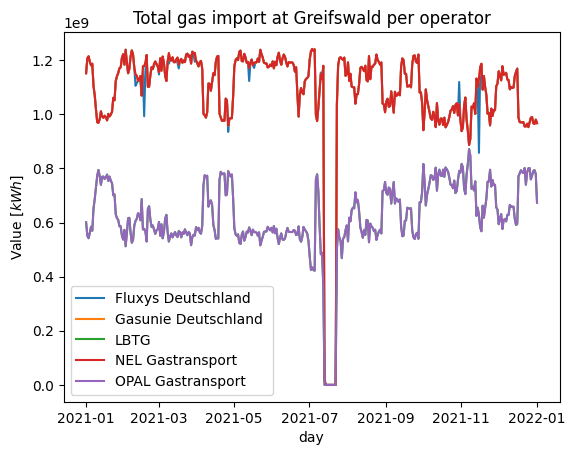

In [9]:
import matplotlib.pyplot as plt

# combine the time columns into a single datetime column
data["datetime"] = pd.to_datetime(data['periodFrom'])

# group by label and plot the values against the datetime column for each group
groups = data.groupby('operatorLabel')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group["datetime"], group['value'], label=name)
ax.set_xlabel('day')
ax.set_ylabel('Value [$kWh$]')
ax.legend()
ax.set_title("Total gas import at Greifswald per operator")
plt.show()

Despite we would expect to see a seasonal behaviour, as gas is used for heating in Germany, we cannot see such a clear trend. Maybe there is more to this, when we aggregate over all operators per month.

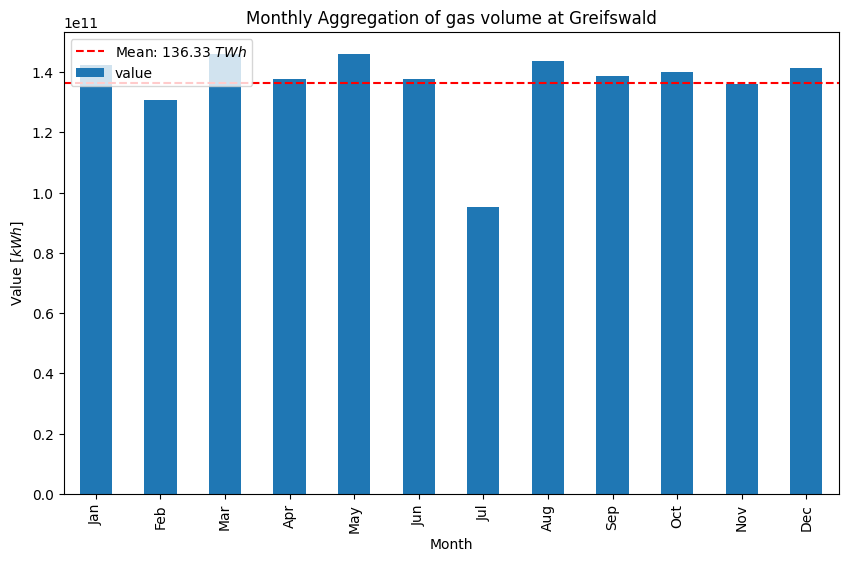

In [10]:
from matplotlib.dates import MonthLocator, DateFormatter

# aggregate data by month for each label
df_month = data.groupby(pd.Grouper(key='datetime', freq='M')).sum()
# remove the last month, as we are interested in all months related to 2021
df_month = df_month.drop(df_month.index[-1])

# plot as bar chart
ax = df_month['value'].plot(kind='bar', figsize=(10,6), legend=False)
ax.set_xlabel('Month')
ax.set_ylabel('Value [$kWh$]')
ax.set_title('Monthly Aggregation of gas volume at Greifswald')

# plot mean as horizontal line
mean_val = df_month['value'].mean()
mean_val_label = mean_val/1000/1000/1000
ax.axhline(y=mean_val, color='red', linestyle='--', label=f'Mean: {mean_val_label:.2f} $TWh$')
ax.legend()

# format x-axis labels to show only month names
ax.set_xticklabels(df_month.index.strftime('%b'))

plt.show()

**Task description:** Looking from the value chain for the operation of the gas system, what part do you thing enables that gas can be imported throughout the year?

**SOLUTION:** In general, gas is used for industrial processes as well as space heating. Gas used for space heating is stored in geological storages for the long-term. It is cheaper from the market side and thereby not necessary to buy only for a selected period.

### Task 1.3 : Calculate the total gas import amount <a class="anchor" id="#task-13--calculate total gas import amount"></a>
**Task description:** Identify the unit in which the gas amount is given. Calculate the gas import as the sum over all operator. Give the answer in TWh.

$$ \sum_{i \in \mathcal{O}, t \in T} x_{i,t} $$

<div class="alert alert-block alert-info">
<b>Tip:</b> You can access a Pandas Dataframe column using dataframe["column"], where dataframe is the name of the dataframe object, in this case data and the column is called value. On this object, you could potentially execute the Pandas functon sum(), which is well described in the documentation.
</div>

In [11]:
all_operator = data["value"].sum()/1000/1000/1000
all_operator

1640.1594341240002

<div class="alert alert-block alert-success">
<b>Solution:</b> The unit is given in kWh, which equals to $10^{-9} TWh$. The final gas import as the sum over all operators equals 1640 TWh.
</div>

### Task 1.4 : Calculate the share of a gas transmission system operator <a class="anchor" id="#task-14--calculate share of gas tso"></a>
**Task description:** Calculate the share of the gas transmission system operator Fluxys in the total gas imported via the pipeline into the German market area zone.

$$ \text{share}_{Fluxys} = \frac{\sum_{t \in \mathcal{T}} x_{Fluxys,t}}{\sum_{i \in \mathcal{O}, t \in \mathcal{T}} x_{i,t}} * 100 $$

where $x_{i,t}$ represents the value of gas flow for operator $i$ at time step $t$ given a set of operators $\mathcal{O} := \{ \text{Fluxys}, \text{Gasunie}, \text{LBTG}, \text{NEL}, \text{OPAL} \}$ and time steps $\mathcal{T}$.

<div class="alert alert-block alert-info">
<b>Tip:</b> You can group the data by a Pandas Dataframe column using dataframe.groupby("column"), where dataframe is the name of the dataframe object, in this case data and the column is called operatorLabel. On this object, you could potentially execute the Pandas functon sum(), which is well described in the documentation. Followed by accessing the data from Fluxys with squared brackets, e.g. ["Fluxys Deutschland"].
</div>

In [12]:
fluxys = data.groupby("operatorLabel")["value"].sum()["Fluxys Deutschland"]/1000/1000/1000
all = data["value"].sum()/1000/1000/1000
share_fluxys = (fluxys / all) * 100
share_fluxys

24.11053684919407

<div class="alert alert-block alert-success">
<b>Solution:</b> The final share is 24.11% for the gas transmission operator Fluxys.
</div>

___
The import for gas is associated with transmission and conversion losses at a substation that varies based on the outdoor temperature. Imagine we have calculated a loss function that describes the losses per day based on a seasonal profile.

The loss function is given as follows:

\begin{equation}
l_t = (\left(1- \eta_{comp} \right) + r_{leak} + \Delta p + \frac{\Delta T}{100}) \times \dot{m_t}, \qquad t = 1,2,\ldots,365
\end{equation}

where:
$$
    \eta_{comp}: \text{the efficiency of the compressor as a decimal value between 0 and 1} \\
    r_{leak}: \text{the rate of gas leakage from the substation, as a decimal value between 0 and 1} \\
    \Delta p: \text{the pressure drop across the substation components, as a decimal value between 0 and 1} \\
    \Delta T: \text{the temperature rise due to gas compression on the t-th day, in degrees Celsius} \\
    \dot{m_t}: \text{the flow rate of gas through the substation on the t-th day, in kWh/day} \\
    l_t: \text{the total losses in the substation on the t-th day, as a decimal value between 0 and 1} \\
$$

The loss function calculates the losses due to each factor separately, with the assumption of a linear relationship between each factor and losses. The total losses on each day are calculated as a weighted sum of the losses due to each factor, with the weightings determined by the flow rate of gas through the substation on that day. The temperature rise due to gas compression is included as a factor in the losses calculation for each day, rather than being averaged over the input data.

We can translate this function into Python by:

In [13]:
def calculate_losses(flow_rates, compressor_efficiency, leakage_rate, pressure_drop, temperature_rises) -> list:
    """
    Calculates the total losses in a gas substation based on several factors.
    
    Args:
        flow_rates (list[float]): The flow rates of gas through the substation, in kWh/day.
        compressor_efficiency (float): The efficiency of the compressor as a decimal value between 0 and 1.
        leakage_rate (float): The rate of gas leakage from the substation, as a decimal value between 0 and 1.
        pressure_drop (float): The pressure drop across the substation components, as a decimal value between 0 and 1.
        temperature_rises (list[float]): The temperature rises due to gas compression, in degrees Celsius.
        
    Returns:
        list[float]: The total losses per day as a list of decimal values between 0 and 1.
    """
    compressor_loss = 1 - compressor_efficiency
    leakage_loss = leakage_rate
    pressure_loss = pressure_drop
    
    temperature_losses = [temperature_rise / 100 for temperature_rise in temperature_rises]  # assume a linear relationship between temperature rise and losses
    
    total_losses = []
    for i, flow_rate in enumerate(flow_rates):
        temperature_loss = temperature_losses[i]
        total_loss = (compressor_loss + leakage_loss + pressure_loss + temperature_loss) * flow_rate
        total_losses.append(total_loss)
    
    return total_losses

We can retrieve the data for the temperature data via an API call using [Open-Meteo](https://open-meteo.com/) for the substation at Greifswald.

In [14]:
import requests
import json

# make a function to get the temperatures of a given location
def getTemperatures(locations, location, start_date, end_date):
    # get the lat and long of the location
    lat, lon = locations[location]
    req = requests.get(f"https://archive-api.open-meteo.com/v1/era5?latitude={lat}&longitude={lon}&start_date={start_date}&end_date={end_date}&hourly=temperature_2m" )
    req = json.loads(req.text)
    # get the tempratures
    temperatures = req['hourly']['temperature_2m']
    # get the times
    times = req['hourly']['time']
    return times, temperatures

# Define some Locations to choose from in Latitude and Longitude
locations = {
    'Greifswald': ['54.143879', '13.645449']
}

# Make a dictionary with the locations as keys and the getTemperatures() function as values
location2data = {}
for location in locations:
    location2data[location] = getTemperatures(locations, location, start_date = "2021-01-01", end_date = "2021-12-31")

Finally, we can start calculating the total losses. Assume a compressor efficiency of 98%, a leakage rate of 5% and a pressure drop of 2%. The flow rates are given from the column "value" in the dataframe. Furthermore the temperature data needs to be resampled from hourly data to a daily average.

In [15]:
substations = {}
substations["Greifswald"] = {
    "flow_rates" : data.groupby("datetime").sum()["value"].iloc[:-2].to_list(),
    "compressor_efficiency" : 0.98,
    "leakage_rate" : 0.05,
    "pressure_drop" : 0.02
}

In [16]:
hourly_temperatures = location2data["Greifswald"][1]
daily_temperatures = []
daily_total = 0
count = 0
for temperature in hourly_temperatures:
    daily_total += temperature
    count += 1
    if count == 24:
        daily_average = daily_total / 24
        daily_temperatures.append(daily_average)
        daily_total = 0
        count = 0

substations["Greifswald"]["temperature_rises"] = daily_temperatures

In [17]:
total_losses = calculate_losses(**substations["Greifswald"])

### Task 1.5 - Calculation of transmission and conversion losses

The efficiency of a system is described in general terms by "output divided by input". For our gas system we could reduce this by writing:

$$ \eta = 1 - \sum_{t \in T} \frac{l_t}{\sum_{i \in \mathcal{O}} x_{i,t}} $$

where $\eta$ describes the efficiency of the system $l_t$ are the losses at time step $t$ and $x_{i,t}$ is the import of transmission system operator $i$ at time step $t$.

**Task description:** Calculate the total losses for the system and determine the efficiency, save it to a variable called `efficiency`.

In [18]:
efficiency = 1 - sum(total_losses)/sum(substations["Greifswald"]["flow_rates"])
efficiency

0.8173290386444159

<div class="alert alert-block alert-success">
<b>Solution:</b> The efficiency of the system should account for 82 %.
</div>

---
The entry point "Greifswald" is no longer operating which makes it necessary for Germany to look for different options. 

Germany was offered three contracts from different suppliers that are able to cover the demand. Supplier A is situated at the entry point Karmoy in Norway and can be reached via an off-shore pipeline with a distance of 3,600 km. Supplier B is situated in the Netherlands and can be reached via an onshore pipeline with a distance of 500 km. The distance from Germany to supplier C is 10,600 km. Supplier C provides gas in liquid form only. The calorific value of LNG is typically higher. Table 1 contains information about the suppliers.

<center>

Supplier | Gas price $p$ [$\$$/$MMBTU$] | Calorific value $h$ [$kWh$/$m^3$]
--- | --- | ---
A | 3 | 10
B | 13 | 9.75
C | 3.45 | 11.5  

In [19]:
supplier = {
    "A" : {
        "carrier_medium" : "offshore pipeline",
        "distance" : 3600,
        "gas_price" : 3,
        "calorific_value" : 10
    },
    "B" : {
        "carrier_medium" : "onshore pipeline",
        "distance" : 500,
        "gas_price" : 13,
        "calorific_value" : 9.75
    },
    "C" : {
        "carrier_medium" : "LNG",
        "distance" : 10600,
        "gas_price" : 3.45,
        "calorific_value" : 11.5
    },
}

## Task 1.6 - Calculate the annual transport capacities

The annual transport capacities needed to satisfy a given demand, can be calculated via

$$ N_m = \frac{\text{demand}}{\text{calorific value}} = \frac{\sum_{i \in \mathcal{O}, t \in T} x_{i,t}}{h_{m}} \quad \forall m \in \mathcal{M} $$

where $m$ is the carrier medium from the set of carriers $\mathcal{M} := \{ \text{Onshore Pipeline}, \text{LNG} \}$.

**Task description:** Calculate the required annual transport capacities $N_P$ and $N_{LNG}$ in billion ($10^9$) cubic meters of natural gas (BCM).

In [20]:
N_offshore = data["value"].sum()/(supplier["A"]["calorific_value"]*10e9)
N_onshore = data["value"].sum()/(supplier["B"]["calorific_value"]*10e9)
N_lng = data["value"].sum()/(supplier["C"]["calorific_value"]*10e9)

print("Annual transport capacities:", "\n", 
      "Offshore: \t", N_offshore, "\n", 
      "Onshore: \t", N_onshore, "\n", 
      "LNG: \t \t", N_lng)

Annual transport capacities: 
 Offshore: 	 16.40159434124 
 Onshore: 	 16.822148042297435 
 LNG: 	 	 14.262255948904349


<div class="alert alert-block alert-success">
<b>Solution:</b> The annual transport capacities are: <br>

 <table>
  <tr>
    <th>Offshore</th>
    <th>Onshore</th>
    <th>LNG</th>
  </tr>
  <tr>
    <td>16.40 BCM</td>
    <td>16.82 BCM</td>
    <td>14.26 BCM</td>
  </tr>
</table> 
    
</div>

As both suppliers meet all necessary requirements, the decision is based on a cost analysis. For this purpose, the investment and operational costs of both available options have to be calculated. The exact costs cannot be determined generically, because they may vary significantly from one region to another because of differences in terrain, climate, labor costs, population density, degree of competition, etc. Indicative costs are therefore assumed in the cost analysis.

---
# Financial mathematics

Financial mathematics plays a crucial role in the evaluation of financial assets to compare between different options.

For CAPEX, it's primarily used to analyze the initial investment needed for constructing energy infrastructure. This includes calculating, e.g. the project's **Net Present Value (NPV)** which considers the estimated cash inflows and outflows over the project's lifetime, taking into account the time value of money. A positive NPV indicates that the project's return will exceed the cost of investment.

To better reflect CAPEX in the evaluation of a project, we often annualize CAPEX. This means we distribute the initial investment cost over the useful life of the pipeline, helping to compare the yearly cost for an initial investment of the asset with the yearly OPEX.

For OPEX, financial mathematics assists in managing and evaluation of ongoing costs, by summarizing the costs associated with the operation of the asset.

In summary, financial mathematics is key in evaluation of financial performance by analyzing and managing both CAPEX and OPEX, and facilitating informed investment and operational decisions.

___
#### Pipeline specification

For this purpose, we first gather information about the pipeline specifications of our onshore pipeline:

<center>

Specification | Index | Unit | Value
--- | --- | --- | ---
Diameter | $\mu$ | [in] | 48
Distance to supplier A | $\delta_A$ | [km] | 2,600
Capacity of compressor stations | $c_{cs}$ | [MW] | 110
Number of compressor stations | $\alpha$ | [1] | <span style="color:red">**???**</span>
Operating cost factor | $\tau_p$ | [%] | 3.5
Self-consumption compressor station | $\lambda$ | [%] | 0.4
Distance between compressor stations | $H$ | [km] | 200
Annual transport capacity | $N_p$ | [$m^3_{Gas}$] | <span style="color:red">**???**</span>
Gas price supplier A | $p_A$ | [\$/MMBTU] | <span style="color:red">**???**</span>
Pipeline efficiency | $\eta_p$ | [%] | 99

</center>


Working with dictionaries in Python is an efficient way of handling information, nevertheless with more information stored, tables are easier to read. We  can now construct the dictionary ``dict_pipeline`` for the specifications of our onshore pipeline. Some values are not determined yet and we initialize them using a ``None`` value.

In [21]:
dict_pipeline = {
    "carrier_medium" : None,
    "diameter" : 48,
    "distance" : 2600,
    "capacity_comp" : 110,
    "number_comp" : None,
    "cost_op" : 0.035,
    "self_consumption" : 0.004,
    "distance_comp" : 200,
    "annual_transport_cap" : None,
    "gas_price_A" : None,
    "efficiency" : 0.99
}

dict_pipeline

{'carrier_medium': None,
 'diameter': 48,
 'distance': 2600,
 'capacity_comp': 110,
 'number_comp': None,
 'cost_op': 0.035,
 'self_consumption': 0.004,
 'distance_comp': 200,
 'annual_transport_cap': None,
 'gas_price_A': None,
 'efficiency': 0.99}

## Task 1.7 - Determine number of compressor stations

The number of compressor stations is given by $\alpha=\frac{\delta_A}{H}$. The conversion for British termal units is 1 MMBTU = 28.5 $m^3_{Gas}$. 

**Task description:** Determine the number of compressor stations and annual transport capacities in British thermal units. Also update the carrier medium and gas price using the information from the dictionary ``supplier``.

<div class="alert alert-block alert-info">
<b>Tip:</b> Reflect that the number of compressor stations can only be an integer. E.g., there exist no 0.74 of compressor stations. However, rounding 0.24 compressor stations would result in no compressor station being build. Therefore, we import the math library and use the ceil-function!
</div>

In [22]:
import math

print("Rounding of 0.24:\t", round(0.24))
print("Rounding of 0.74:\t", round(0.74))
print("Ceiling of 0.24:\t", math.ceil(0.24))
print("Ceiling of 0.74:\t", round(0.74))

Rounding of 0.24:	 0
Rounding of 0.74:	 1
Ceiling of 0.24:	 1
Ceiling of 0.74:	 1


<div class="alert alert-block alert-info">
<b>Tip:</b> You can update values in an already existing dictionary by executing dict.update(new_dict) on the dictionary. This will update the existing values by newly supplied values.
</div>

In [23]:
dict_pipeline.update({
    "carrier_medium" : 
        supplier["B"]["carrier_medium"],
    "number_comp" : 
        math.ceil(dict_pipeline["distance"] / dict_pipeline["distance_comp"]),
    "annual_transport_cap" : 
        N_onshore * 10e9,
    "gas_price_A" : 
        supplier["B"]["gas_price"] / 28.5
})

dict_pipeline

{'carrier_medium': 'onshore pipeline',
 'diameter': 48,
 'distance': 2600,
 'capacity_comp': 110,
 'number_comp': 13,
 'cost_op': 0.035,
 'self_consumption': 0.004,
 'distance_comp': 200,
 'annual_transport_cap': 168221480422.97437,
 'gas_price_A': 0.45614035087719296,
 'efficiency': 0.99}

### Pipelines (onshore)
The natural gas via pipeline value chain consists of transportation via pipeline and compressor stations to maintain the pressure. Coming back to financial mathematics, we can look at costs associated first with the construction (CAPEX) and then the operation (OPEX).

**CAPEX** (pipe materials, installation and coating of the pipe, compressor stations, construction management, right-of-way clearance):

$$ CAPEX_{onshore} = \underbrace{\overbrace{\frac{\$ 96.333}{in \cdot km}}^{\text{Cost per distance/diameter}} \times \mu \times \delta_A}_{\text{Construction costs of pipes}} + \underbrace{\overbrace{(\$ 3 \cdot 10^7}^{\text{Land aquisition}} + \overbrace{\frac{\$ 4,145}{MW}}^{\text{Cost for pumps and valves}} \times c_{CS}) \times \alpha}_{\text{Construction cost of compressor station}} $$

1. ***Construction cost of pipes:*** These include all costs for pipes being built, e.g. pipes, valves but also larbor and machinery, where $\mu$ represents the diameter being build and $\delta_A$ is the length needed to built the plattform.

2. ***Construction cost of compressor station:*** Additional infrastructure needed for pumps and compressor stations, where $\alpha$ is the number of compressor stations needed, $c_{CS}$ is the capacity for one compressor station at the given diameter

**OPEX** (compressor station fuel, pipe repairs, environmental permits, administrative costs):

$$ OPEX_{onshore} = \underbrace{CAPEX_{onshore} \times \tau_p}_{\text{Maintenance and repairs}} + \underbrace{(1-(1-\lambda)^\frac{\delta_A}{H}) \times N_p \times p_A \times \eta_A}_{\text{Loss compensation}} $$

1. ***Maintenance and Repairs***: This includes routine inspections, servicing, and any necessary repairs to the pipeline and its associated infrastructure.

2. ***Loss compensation:*** The cost of loss occur because the final energy delivery has to be met by the operator, therefore the transmission system operator has to buy the additional energy needed to compensate the internal losses.

In summary, the primary difference between CAPEX and OPEX is that CAPEX are the major investments made to create, upgrade, or maintain the physical assets (like the construction of an onshore pipeline), while OPEX are the ongoing costs to operate and maintain those assets.

#### _Option 1 [advanced]:_
**Task description:** Creating a class and execute methods on objects of this class.

First, let's talk about classes. In Python, a class is a blueprint for creating objects (a particular data structure), providing initial values for state (member variables or attributes), and implementations of behavior (member functions or methods).

The class in your example is called ``Pipeline``, and it has several attributes like ``carrier_medium``, ``diameter``, ``distance`` etc. These attributes represent the specifications of an onshore pipeline.

In [24]:
class Pipeline:
    def __init__(self, dict):
        self.carrier_medium = dict['carrier_medium']
        self.diameter = dict['diameter']
        self.distance = dict['distance']
        self.capacity_comp = dict['capacity_comp']
        self.number_comp = dict['number_comp']
        self.cost_op = dict['cost_op']
        self.self_consumption = dict['self_consumption']
        self.distance_comp = dict['distance_comp']
        self.annual_transport_cap = dict['annual_transport_cap']
        self.gas_price = dict['gas_price_A']
        self.efficiency = dict['efficiency']

``__init__`` is a special method in Python classes. It's the constructor method that's automatically called when you create a new object from a class. The ``self`` parameter is a reference to the current instance of the class and is used to access variables that belong to the class. It doesn't have to be named ``self``, you can call it whatever you like, but it has to be the first parameter of any method in the class.

Here, we're using a dictionary ``dict`` as a parameter in our constructor to assign values to the attributes of our class. This is a common way of initializing many attributes at once, and it also makes the code cleaner and easier to understand.

Now, to create an object of the class ``Pipeline``, you would do something like:

In [25]:
onshore_pipeline = Pipeline(dict_pipeline)

Here, ``dict_pipeline`` is a dictionary containing all the attributes required by our ``Pipeline`` class. Then we create a new object ``onshore_pipeline`` from our ``Pipeline`` class by passing ``dict_pipeline`` to it.

Next, let's talk about methods in a class. In your example, you have two methods, ``CAPEX`` and ``OPEX``, which calculate the capital expenditures (CAPEX) and operational expenditures (OPEX) of the pipeline, respectively.

In [26]:
def CAPEX(self) -> float:
    
    pipe_material =  96333 * self.diameter * self.distance
    compressor_stations = (3*10e7 + 4125 * self.capacity_comp) * self.number_comp
    capex_pipeline = pipe_material + compressor_stations
    
    return capex_pipeline

Pipeline.CAPEX = CAPEX

In this piece of code, you're first defining a method ``CAPEX`` outside of your class. This method calculates the CAPEX based on some equations. You then add this method to your class ``Pipeline`` by doing ``Pipeline.CAPEX = CAPEX``. Finally, you call the method ``CAPEX`` on your object ``onshore_pipeline`` by doing ``onshore_pipeline.CAPEX()``.

In [27]:
onshore_pipeline.CAPEX()/1e9

15.92825715

<div class="alert alert-block alert-success">
<b>Solution:</b> CAPEX is almost 16 billion Euros.
</div>

The ``OPEX`` method works in a similar way, and it would also be more conventional to define it inside the Pipeline class.

In [28]:
def OPEX(self) -> float:
    
    operating_cost = self.CAPEX() * self.cost_op
    fuel_cost = (1-(1-self.self_consumption)**self.number_comp)*self.annual_transport_cap*self.gas_price*self.efficiency
    opex_pipeline = operating_cost + fuel_cost
    
    return opex_pipeline

Pipeline.OPEX = OPEX

You call this method on your object ``onshore_pipeline`` by doing ``onshore_pipeline.OPEX()``.

In [29]:
onshore_pipeline.OPEX()/1e9

4.4142555061719895

<div class="alert alert-block alert-success">
<b>Solution:</b> OPEX is 4.4 million Euros per year.
</div>

#### _Option 2:_
**Task description:** Creating a simple function executed on the dictionary. In both of these functions, the dictionary (``dict_pipeline``) is a crucial input. \
This dictionary contains all the necessary values for both the CAPEX and OPEX calculations. \
This is why it's important that the dictionary is well-formed and contains all necessary values, otherwise the functions won't work correctly.

A pseudo-description of the CAPEX-function could look like the following:

Input: Dictionary from onshore pipeline

1. It begins by extracting the values of the pipeline's diameter, distance, compressor capacity, and number of compressors from the input dictionary.

2. The cost of the pipeline material is calculated as a product of a constant value, the pipeline's diameter, and its distance. This is stored in pipe_material.

3. The cost of the compressor stations is calculated as the product of the sum of a constant value and the product of another constant value and the compressor capacity, multiplied by the number of compressors. This is stored in compressor_stations.

4. The total capital expenditure (capex_pipeline) is calculated as the sum of the cost of the pipeline material and the cost of the compressor stations.

Output: The function then returns this total capital expenditure (capex_pipeline).

In [30]:
def capex_pipeline(dict_pipeline) -> float:
    
    diameter = dict_pipeline["diameter"]
    distance = dict_pipeline["distance"]
    capacity_comp = dict_pipeline["capacity_comp"]
    number_comp = dict_pipeline["number_comp"]
    
    pipe_material =  96333 * diameter * distance
    compressor_stations = (3*10e7 + 4125 * capacity_comp) * number_comp
    capex_pipeline = pipe_material + compressor_stations
    
    return capex_pipeline

capex_pipeline = capex_pipeline(dict_pipeline)
capex_pipeline

15928257150.0

This function calculates the Operational Expenditures (OPEX) of a pipeline.

1. It begins by extracting the values of the pipeline's operational cost, self-consumption, number of compressors, annual transport capacity, gas price, and efficiency from the input dictionary. It also takes the previously calculated capital expenditure as an input.

2. The operating cost is calculated as a product of the capital expenditure and the operational cost. This is stored in ``operating_cost``.

3. The fuel cost is calculated as the product of (1 - (1 - self-consumption) raised to the power of the number of compressors), the annual transport capacity, the gas price, and the efficiency. This is stored in ``fuel_cost``.

4. The total operational expenditure (``opex_pipeline``) is calculated as the sum of the operating cost and the fuel cost.

5. The function then returns this total operational expenditure (``opex_pipeline``).

In [31]:
def opex_pipeline(dict_pipeline, capex_pipeline) -> float:
    
    cost_op = dict_pipeline["cost_op"]
    self_consumption = dict_pipeline["self_consumption"]
    number_comp = dict_pipeline["number_comp"]
    annual_transport_cap = dict_pipeline["annual_transport_cap"]
    gas_price = dict_pipeline["gas_price_A"]
    efficiency = dict_pipeline["efficiency"]
    
    operating_cost = capex_pipeline * cost_op
    fuel_cost = (1-(1-self_consumption)**number_comp)*annual_transport_cap*gas_price*efficiency
    opex_pipeline = operating_cost + fuel_cost
    
    return opex_pipeline

opex_pipeline = opex_pipeline(dict_pipeline, capex_pipeline)
opex_pipeline

4414255506.171989

We can compare the class-based approach with the function-based approach. Both have their advantages and appropriate use-cases, and which one you choose will depend on the specific needs of your project.

**1. Function-Based Approach**

The function-based approach is straightforward and easy to understand, especially for those new to programming. In your example, you define two functions, CAPEX and OPEX, and call these functions with the pipeline dictionary as an argument. This approach has a couple of advantages:

- ***Simplicity***: The function-based approach is less abstract, which can make it easier for beginners to grasp.

- ***Procedural Logic***: Some problems are better suited to procedural logic, where you perform one operation after another. If the problem you're trying to solve fits this model, a function-based approach can be clearer and more straightforward.

However, this approach has some drawbacks when it comes to larger, more complex projects:

- ***State management***: In more complex scenarios, passing around dictionaries (or other data structures) to share state can become unwieldy, and it increases the chance of errors.

- ***Scalability and maintenance***: As your codebase grows, having related pieces of data and behavior (like a pipeline's specifications and the calculations that use those specs) spread out across different parts of the code can make the code harder to read, understand, and maintain.

**2. Class-Based Approach (Object-Oriented Programming)**

In contrast, the class-based approach groups related data and behavior together in a single class. This has several advantages:

- ***Encapsulation***: A class can encapsulate both data (like a pipeline's specifications) and behavior (like the CAPEX and OPEX calculations) in one place. This makes the code easier to read and understand, because it's clear that these pieces of data and behavior are related.

- ***Code organization and reusability***: Once you've defined a class, you can create many objects from that class, all with their own individual state. This is a powerful tool for organizing your code and making it more reusable.

- ***Extensibility***: With classes, it's easy to create more specialized versions of a class (through inheritance), without having to duplicate code. This can make your codebase easier to extend and maintain.

However, the class-based approach also has some potential downsides:

- ***Complexity***: The concepts behind classes and object-oriented programming (OOP) can be more abstract and harder for beginners to understand.

- ***Overhead***: Creating a class and instances of a class can involve more code and more conceptual overhead than a simple function-based approach. If your project is simple and doesn't benefit from the extra structure provided by classes, using classes can make your code more complex and harder to understand.

In summary, the best approach depends on the specifics of what you're trying to achieve. For simple scripts or projects, a function-based approach might be more straightforward and easier to understand. For larger or more complex projects, the structure, organization, and reusability provided by a class-based approach might be more beneficial.

___
#### LNG specification

<center>

Specification | Index | Unit | Value
--- | --- | --- | ---
Project capacity | $C_{LNG}$ | [MTPA] | <span style="color:red">**???** </span>
Annual transport capacity | $N_{LNG}$ | [$m^3_{LNG}$] | <span style="color:red">**???** </span>
Distance to supplier C | $\delta_B$ | [km] | <span style="color:red">**???**</span>
Velocity of carrier | $\nu$ | [km/h] | 36
Efficiency liquefaction | $\Phi$ | [%] | 9.5
BOG rate regasification | $\xi$ | [%] | 0.15
BOG rate carrier | $\xi$ | [%] | 0.11
Operating cost factor liquefaction | $\tau_{LNG}$ | [%] | 3.5
Operating cost factor regasification | $\sigma$ | [%] | 2.5
Gas self-consumption | $\omega$ | [%] | <span style="color:red">**???**</span>
Gas price supplier C | $p_B$ | [\$/MMBTU] | <span style="color:red">**???**</span>

</center>

In [32]:
dict_lng = {
    "carrier_medium" : None,
    "project_capacity" : None,
    "annual_transport_cap" : N_lng * 10e9,
    "distance" : None,
    "velocity" : 3.6,
    "efficiency_liquefaction" : 0.095,
    "BOG_rate_regasification" : 0.0015,
    "BOG_rate_carrier" : 0.0011,
    "operating_cost_liquefaction" : 0.035,
    "operating_cost_regasification" : 0.025,
    "gas_self_consumption" : None,
    "gas_price_C" : None
}

dict_lng

{'carrier_medium': None,
 'project_capacity': None,
 'annual_transport_cap': 142622559489.0435,
 'distance': None,
 'velocity': 3.6,
 'efficiency_liquefaction': 0.095,
 'BOG_rate_regasification': 0.0015,
 'BOG_rate_carrier': 0.0011,
 'operating_cost_liquefaction': 0.035,
 'operating_cost_regasification': 0.025,
 'gas_self_consumption': None,
 'gas_price_C': None}

## Task 1.8 - Determine LNG specifications

Determine the gas self consumption by $ \omega = \Phi + \Omega + (1-(1-\xi)^\frac{\delta_B}{\nu \cdot 24h}) $.

In [33]:
dict_lng.update({
    "carrier_medium" : 
        supplier["C"]["carrier_medium"],
    "project_capacity" : 
        dict_lng["annual_transport_cap"] / (1342 * 10e6),
    "distance" : 
        supplier["C"]["distance"],
    "gas_self_consumption" : 
        dict_lng["efficiency_liquefaction"] + dict_lng["BOG_rate_regasification"] + (1- (1-dict_lng["BOG_rate_carrier"])**( (supplier["C"]["distance"])/(dict_lng["velocity"]*24) ) ),
    "gas_price_C" : 
        supplier["C"]["gas_price"] / 28.5
})

dict_lng

{'carrier_medium': 'LNG',
 'project_capacity': 10.627612480554657,
 'annual_transport_cap': 142622559489.0435,
 'distance': 10600,
 'velocity': 3.6,
 'efficiency_liquefaction': 0.095,
 'BOG_rate_regasification': 0.0015,
 'BOG_rate_carrier': 0.0011,
 'operating_cost_liquefaction': 0.035,
 'operating_cost_regasification': 0.025,
 'gas_self_consumption': 0.22280853691500044,
 'gas_price_C': 0.12105263157894737}

### LNG
The LNG value chain consists of natural gas cooling and liquefaction, transportation, and regasification at destination and possible interim storage.

<u> Liquefaction </u> \
CAPEX (liquefaction plant - pumps, compressors, heat exchanger, materials, installation, construction management, right-of-way-clearance):

$$ CAPEX_{\text{Liquefaction}} = (6.4 + 0.86 \times (C_{LNG} - 4 MTPA)) \cdot 10^9 \cdot \frac{\$}{MTPA} $$

<u> Regasification </u> \
CAPEX (regasification terminal - materials, installation, construction management, right-of-way-clearance)

$$ CAPEX_{\text{Regasification}} = 0.245 \times C_{LNG} \cdot 10^9 \cdot \frac{\$}{MTPA} $$

<u> Storage </u> \
CAPEX for storage are already included in  $CAPEX_{\text{Liquefaction} / \text{Regasification}}$. Their cost share accounts for approximately 30 %.
Losses during storage occur due to evaporation and leakage of gas. The average so-called Boiloff-Gas (BOG) rate accounts for 0.05-0.1 % per day, because the tank is constantly exposed to heat from the environment. These losses can be neglected. 

<u> Shipping </u> \
LNG carriers are usually chartered, which means no investment has to be made. 
Charter costs have to be considered in the operational costs with approximately $33,000 \$ $ per day for carriers with typical capacities between $150,000-180,000 \ m^3_{LNG}$. In addition, fuel costs must be taken into account. Regarding operational costs of the LNG transportation it has to be considered that during loading and unloading, charter fees are charged, but no fuel is consumed. Additionally, port and customs duties have to be paid, which are depending on the route.
It can be assumed that operational costs for the carrier amount to $80 \$ \cdot 10^6$. 

<u> LNG </u>
Total costs derive from the sum of the individual components with $C_{LNG}$ being the project capacity in million tons per year:

$$ CAPEX_{LNG} = CAPEX_{\text{Liquefaction}} + CAPEX_{\text{Regasification}} $$

$$ OPEX_{LNG} = CAPEX_{\text{Liquefaction}} \times \tau_{LNG} + CAPEX_{\text{Regasification}} \times \sigma + OPEX_{\text{carrier}} + N_{LNG} \times p_B \times \omega $$

with $$ \omega = \Phi + \Omega + (1-(1-\xi)^\frac{\delta_B}{\nu \cdot 24h}) $$

and $$ C_{LNG} = \frac{N_{LNG}}{1,342 \cdot 10^6 \cdot \frac{m^3_{Gas}}{MTPA}} $$

## Task 1.9 - Calculate CAPEX and OPEX for LNG

***Task description:*** Calculate $ CAPEX_{LNG} $ and $ OPEX_{LNG} $ by creating a class and/or functions.

In [34]:
class LNG:
    def __init__(self, dict):
        self.carrier_medium = dict['carrier_medium']
        self.project_capacity = dict['project_capacity']
        self.annual_transport_cap = dict['annual_transport_cap']
        self.distance = dict['distance']
        self.velocity = dict['velocity']
        self.efficiency_liquefaction = dict['efficiency_liquefaction']
        self.BOG_rate_regasification = dict['BOG_rate_regasification']
        self.BOG_rate_carrier = dict['BOG_rate_carrier']
        self.operating_cost_liquefaction = dict['operating_cost_liquefaction']
        self.operating_cost_regasification = dict['operating_cost_regasification']
        self.gas_self_consumption = dict['gas_self_consumption']
        self.gas_price = dict['gas_price_C']

$$ CAPEX_{\text{Liquefaction}} = (6.4 + 0.86 \times (C_{LNG} - 4 MTPA)) \cdot 10^9 \cdot \frac{\$}{MTPA} $$

$$ CAPEX_{\text{Regasification}} = 0.245 \times C_{LNG} \cdot 10^9 \cdot \frac{\$}{MTPA} $$

$$ CAPEX_{LNG} = CAPEX_{\text{Liquefaction}} + CAPEX_{\text{Regasification}} $$

In [35]:
def CAPEX_liquefaction(self) -> float:

    capex_liquefaction = (6.4 + 0.86 * (self.project_capacity - 4) * 10e9)
    
    return capex_liquefaction

def CAPEX_regasification(self) -> float:

    capex_regasification = 0.245 * self.project_capacity * 10e9

    return capex_regasification

def CAPEX(self) -> float:

    capex = self.CAPEX_liquefaction() + self.CAPEX_regasification()

    return capex

LNG.CAPEX_liquefaction = CAPEX_liquefaction
LNG.CAPEX_regasification = CAPEX_regasification
LNG.CAPEX = CAPEX

$$ OPEX_{LNG} = CAPEX_{\text{Liquefaction}} \times \tau_{LNG} + CAPEX_{\text{Regasification}} \times \sigma + OPEX_{\text{carrier}} + N_{LNG} \times p_B \times \omega $$

with $$ \omega = \Phi + \Omega + (1-(1-\xi)^\frac{\delta_B}{\nu \cdot 24h}) $$

and $$ C_{LNG} = \frac{N_{LNG}}{1,342 \cdot 10^6 \cdot \frac{m^3_{Gas}}{MTPA}} $$

In [36]:
def OPEX(self) -> float:

    opex = self.CAPEX_liquefaction() * self.operating_cost_liquefaction \
        + self.CAPEX_regasification() * self.operating_cost_regasification \
        + self.annual_transport_cap * self.gas_price * self.gas_self_consumption

    return opex

LNG.OPEX = OPEX

In [37]:
def capex_lng(dict_lng) -> float:

    capex_liquefaction = (6.4 + 0.86 * (dict_lng["project_capacity"] - 4) * 10e9)
    
    capex_regasification = 0.245 * dict_lng["project_capacity"] * 10e9

    return (capex_liquefaction + capex_regasification)

capex_lng = capex_lng(dict_lng)
capex_lng

83035117916.52896

In [38]:
def opex_lng(dict_lng) -> float:

    capex_liquefaction = (6.4 + 0.86 * (dict_lng["project_capacity"] - 4) * 10e9)
    
    capex_regasification = 0.245 * dict_lng["project_capacity"] * 10e9
    
    opex_liquefaciton = capex_liquefaction * dict_lng["operating_cost_liquefaction"]
    
    opex_regasification = capex_regasification * dict_lng["operating_cost_regasification"]
    
    opex_operation = dict_lng['annual_transport_cap'] * dict_lng['gas_price_C'] * dict_lng['gas_self_consumption']

    return (opex_liquefaciton + opex_regasification + opex_operation)
    
opex_lng = opex_lng(dict_lng)
opex_lng

6492605503.668119

## Task 1.10 - Calculation of Net Present Values

To compare two investment decisions, the net present value method is commonly used. Both the pipeline and LNG infrastructure have a 20-year life time. The internal rate of return is the discount rate that could be earned in alternative investments. For this comparison, it is assumed to be 5 %.

The net present value is defined as 

$$ NPV = \sum_{t=0}^{T} \frac{\text{cash flow}_t}{(1+i)^t} = I_0 + \sum_{t=1}^{T} \frac{\text{cash flow}_t}{(1+i)^t}$$

Write the function for the net present value, assuming **equal** payments in each period.

In [39]:
def net_present_value(cash_flow: float, T: int, interest_rate: float):
    return sum(cash_flow/(1+interest_rate)**t for t in range(T))

Calculate the net present value for equal payments of 10 units, a lifetime of 35 years and at an interest rate of 5%.

In [40]:
net_present_value(10, 35, 0.05)

171.92904007595865

Calculate the net present value for equal payments of 10 units, a lifetime of 35 years and at an interest rate of 1%.

In [41]:
net_present_value(10, 35, 0.01)

297.026658885233

The net present value for an investment with a lower interest rate is higher. What is reflected by the interest rate?

Earnings by an alternative investement for example investing money in governmental bonds.

## Task 1.11 - Calculation of Present Value Factor
To annualize the Capital Expenditures (CAPEX), we need to consider the concept of the ***Present Value factor (PVF)***. The PVF allows us to determine the current worth of a future sum of money. In essence, it discounts future cash flows to present values using a specific discount rate. 

If cash flows are equal for $t = 1,\ldots,T$, the present value factor can be used:
    
$$ PVF = \frac{(1+i)^T-1}{(1+i)^T \cdot i} $$

$$ NPV = I_0 + \text{cash flow}_1 \cdot PVF $$

**Task description:** Select an option using the net present value method.

In [42]:
# Your computation of npv for pipeline goes here
def present_value_factor(T: int, interest_rate: float):
    return ((1+interest_rate)**T - 1) / ((1+interest_rate)**T * interest_rate)

In [43]:
# Continuation
# Option 1
npv_pipeline_option1 = onshore_pipeline.CAPEX() + onshore_pipeline.OPEX() * present_value_factor(20, 0.05)
# Option 2
npv_pipeline_option2 = capex_pipeline + opex_pipeline * present_value_factor(20, 0.05)

assert npv_pipeline_option1 == npv_pipeline_option2

In [44]:
print("The annualised total system costs for an onshore pipeline: ", npv_pipeline_option1/1000/1000/1000)

The annualised total system costs for an onshore pipeline:  70.93963777363068


In [45]:
# Your computation of npv for LNG terminal goes here
lng_terminal = LNG(dict_lng)

In [46]:
# Continuation
# Option 1
npv_lng_option1 = lng_terminal.CAPEX() + lng_terminal.OPEX() * present_value_factor(20, 0.05)
# Option 2
npv_lng_option2 = capex_lng + opex_lng * present_value_factor(20, 0.05)

In [47]:
print("The annualised total system costs for an LNG terminal: ", npv_lng_option1/1000/1000/1000)

The annualised total system costs for an LNG terminal:  163.94733337437387
